# Airbnb Qualitative Look

In terms of price and customer rating, our Airbnb accommodations generally compared favorably to hotel rooms in our analysis. In almost all cities, Airbnb was cheaper and accommodation review scores were higher. Mapping Airbnb listings indicated a greater variety of location stay choices than hotels offered within cities as well.

A closer look at our data source, Inside Airbnb (http://insideairbnb.com/get-the-data.html ), and several stories in the news indicate detrimental effects of Airbnb on communities. Many city residents argue that the proliferation of Airbnb listings is driving up living costs, compounding affordable housing shortages, and destroying the character of neighborhoods by converting the population from vested residents to transient tourists.

If we had more time and knowledge how to pursue records for housing and community impact, we might have developed a more nuanced story to tell about Airbnb vs hotels. In the meantime, we used the Google custom search API with a custom engine directed at news sites: bbc.com, washingtonpost.com, dailymail.co.uk, foxnews.com, nytimes.com, buzzfeed.com, usatoday.com, cbsnews.com, huffpost.com, nbcnews.com, abcnews.go.com, and cnn.com. We submitted a query "airbnb" and made a word cloud of the headlines returned in response.

This word cloud appears to be heavily influenced by one recent news story about an Israeli Airbnb. We saved it anyway because the image reflects an expected result - the words suggest controversy.

----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import math
import json
from pprint import pprint

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# gmaps and geojson
import geopy.distance
import gmaps
import gmaps.geojson_geometries

# Google developer API key
from config import gkey
gmaps.configure(api_key=gkey)

# word cloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# List of Eight World Cities Chosen
cityL=["Amsterdam","Beijing","Las Vegas","Los Angeles","Madrid","New York","Paris","Sydney"]


In [2]:
# do a custom search of 12 top Internet news sites with Google Custom Search api
# get title, snippet, and source for response to 'airbnb' query and put in dataframe

params = {
    "key": gkey,
    "cx":"002010857416973848295:kszq0sbcgu8"
}
base_url = "https://www.googleapis.com/customsearch/v1"
params['q'] = 'airbnb'

itemL=[]

# try to get max 100 responses, each call returns 10
for i in range(10):
    params['start'] = i*10+1
    response = requests.get(base_url, params=params).json()
    content=response['items']
    for item in content:
        mdict={}
        mdict['source'] = item["displayLink"]
        mdict['title'] = item["title"]
        mdict['snippet'] = item["snippet"]
        itemL.append(mdict)
        
newsdf = pd.DataFrame(itemL)
newsdf.head()

,snippet,source,title
0,"1 day ago ... In December, a group of Israeli ...",www.buzzfeed.com,My Palestinian Family's Land Was Stolen. Then ...
1,"Mar 13, 2019 ... SAN FRANCISCO — Riley Newman,...",www.nytimes.com,'We Know Them. We Trust Them.' Uber and Airbnb...
2,Learn how Ellis Island became an iconic symbol...,www.nytimes.com,"Via an Island of Hope, a New Home (Paid Post b..."
3,"May 10, 2018 ... A group of black people say t...",www.cnn.com,Three black people checked out of their Airbnb...
4,1 day ago ... Airbnb has come under fire for a...,www.dailymail.co.uk,Airbnb struggles to crack down on hosts who se...


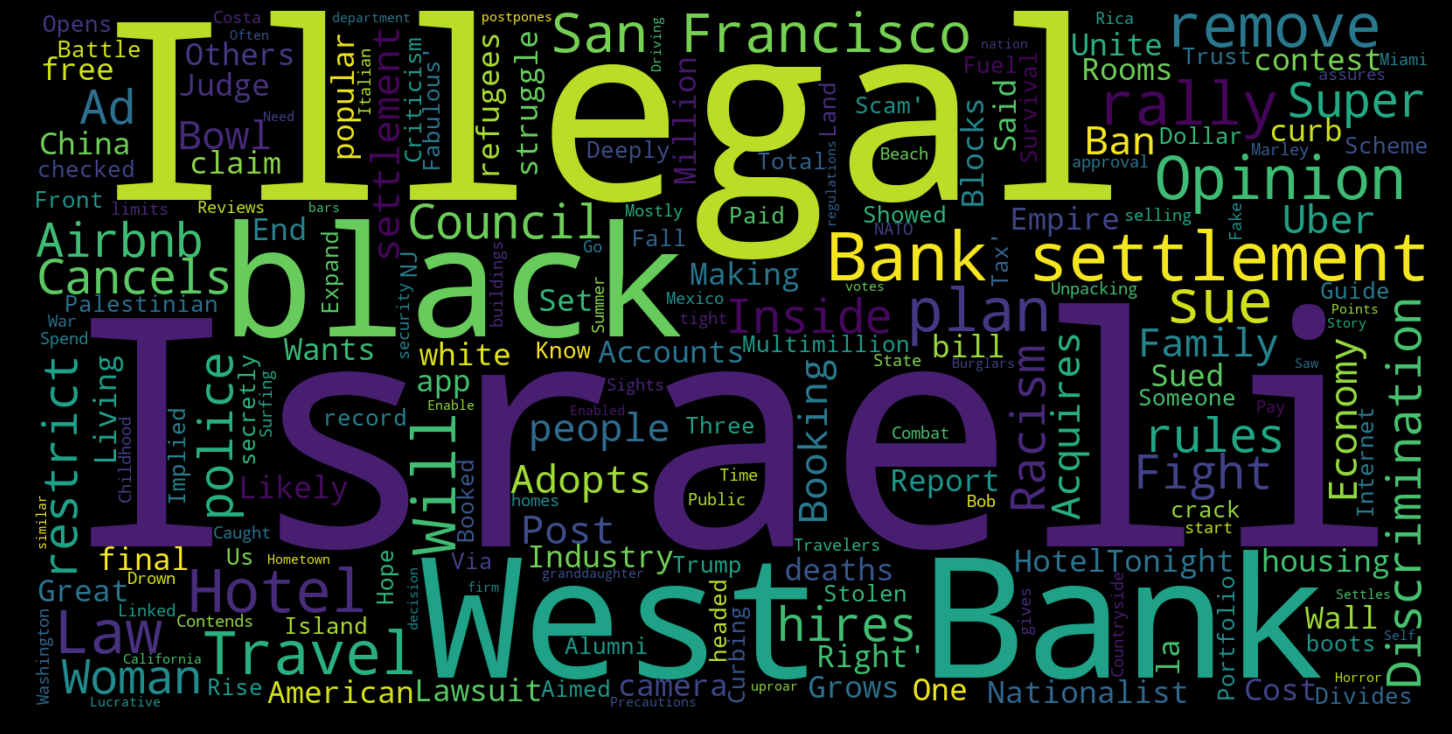

In [9]:
titleL = newsdf['title'].tolist()
ttext = " ".join(title for title in titleL)


# Create and generate a word cloud image for news item titles:
# remove common neutral words/news outlet names/months from consideration
stopwords = set(STOPWORDS)
stopwords.update(["new","york","times","cnn","bbc","news","company","rentals","home","rental","Airbnb", "host", "guest", "listing", "apartment", "listings", "says","hosts", "guests","year","city"])
stopwords.update(["Jan","Feb","Mar","April","May","June","July","Aug","Sept","Oct","Nov","Dec"])

wordcloud = WordCloud(width=1600, height=800, background_color="black", stopwords=stopwords).generate(ttext)

# Display the generated image:

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

# save image
newstitlefile = os.path.join("saveImages","newsTitleCloud.png")
wordcloud.to_file(newstitlefile)